# A Basic Demo of SVT

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from time import time
import os

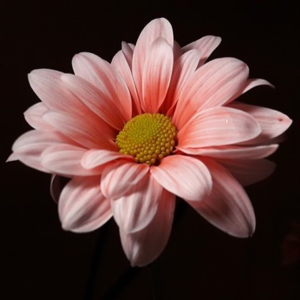

In [2]:
img_path = "./flower/original.jpg"
img = Image.open(img_path).resize((300,300))
img

In [3]:
def Dtau(A,tau):
    U,S,Vh = np.linalg.svd(A)
    S = np.array([max(0,s-tau) for s in S])
    SDtau = np.zeros((S.shape[0],Vh.shape[0]))
    SDtau[:S.shape[0], :S.shape[0]] = np.diag(S)
    result = U @ SDtau @ Vh
    return result

In [22]:
W,H = img.width,img.height

i = 0.2 # % of pixels to be missing

mask = np.random.random((H,W)) < i

delta = 1.2*W*H/mask.sum()
tau = 5000
epsilon = 1


RGB = []
for channel in range(3):
    M = np.array(img)[:,:,channel]

    start = time()
    
    X,Y = np.zeros(M.shape),np.zeros(M.shape) # initialize Y=X=0
        
    delta_xy, delta_XM = ((X-Dtau(Y,tau))**2).mean()**0.5, np.abs(X*mask-M*mask).mean()
    for i in range(1000):
        X = Dtau(Y,tau)
        Y = Y + delta*(M-X)*mask
        
        delta_xy_, delta_XM_ = ((X-Dtau(Y,tau))**2).mean()**0.5, np.abs(X*mask-M*mask).mean()

        if abs(delta_xy_-delta_xy) < epsilon and abs(delta_XM-delta_XM_) < epsilon:
            print("converged")
            break
        
        delta_xy,delta_XM = delta_xy_, delta_XM_

    end = time()
    print("TIME:", end-start)
    RGB.append(X)

C:\Users\Diana\miniconda3\envs\diploma\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Diana\AppData\Local\Temp\ipykernel_21468\1183135392.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(delta_xy_-delta_xy) < epsilon and abs(delta_XM-delta_XM_) < epsilon:
C:\Users\Diana\AppData\Local\Temp\ipykernel_21468\1183135392.py:25: RuntimeWarning: overflow encountered in square
  delta_xy_, delta_XM_ = ((X-Dtau(Y,tau))**2).mean()**0.5, np.abs(X*mask-M*mask).mean()
C:\Users\Diana\AppData\Local\Temp\ipykernel_21468\1203563258.py:6: RuntimeWarning: invalid value encountered in matmul
  result = U @ SDtau @ Vh
C:\Users\Diana\AppData\Local\Temp\ipykernel_21468\1183135392.py:23: RuntimeWarning: invalid value encountered in multiply
  Y = Y + delta*(M-X)*mask


LinAlgError: SVD did not converge

In [ ]:
scale = True # scale the RGB channels to 0-255?
if scale:
    RGB = [(i-i.min())/(i.max()-i.min())*255 for i in RGB]
new_pixels = np.array(RGB,dtype=np.uint8).transpose((1,2,0))
reconstructed = np.array(np.array(img)*mask[:,:,np.newaxis] + new_pixels*(1-mask[:,:,np.newaxis]), dtype=np.uint8)
print("restored image")
Image.fromarray(reconstructed)

In [ ]:
print("original image with noise")
Image.fromarray(img*mask[:,:,np.newaxis])

In [ ]:
print("matrix X")
Image.fromarray(new_pixels)